# Assignment is at the bottom! 

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

In [3]:
y = np.concatenate([np.zeros(10), np.ones(10)])
x = np.linspace(0, 10, len(y))

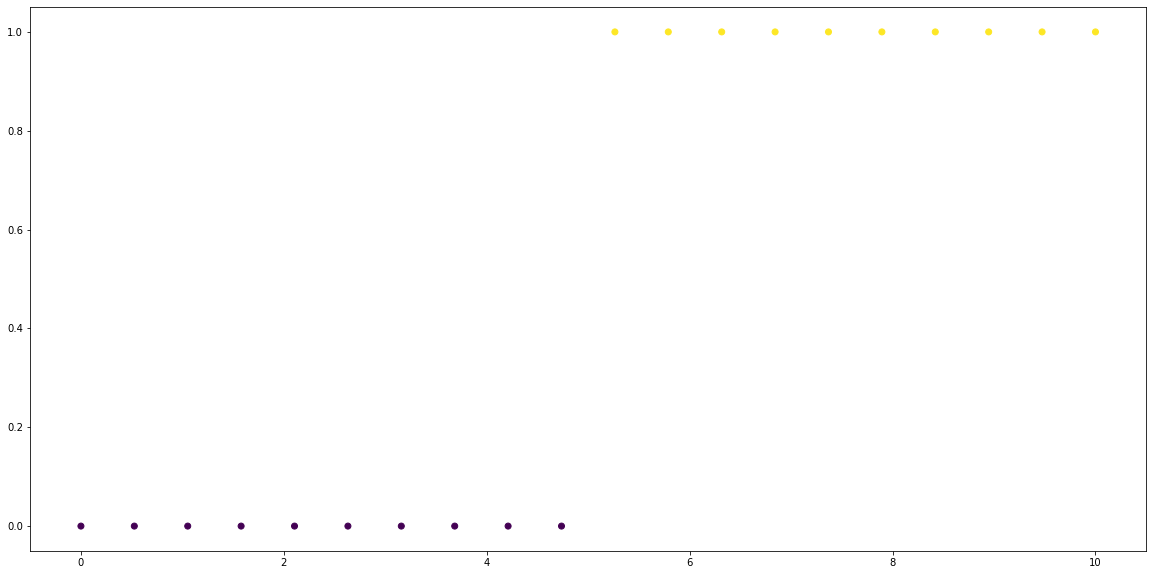

In [4]:
plt.scatter(x, y, c=y)

In [5]:
model = LogisticRegression()

In [6]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

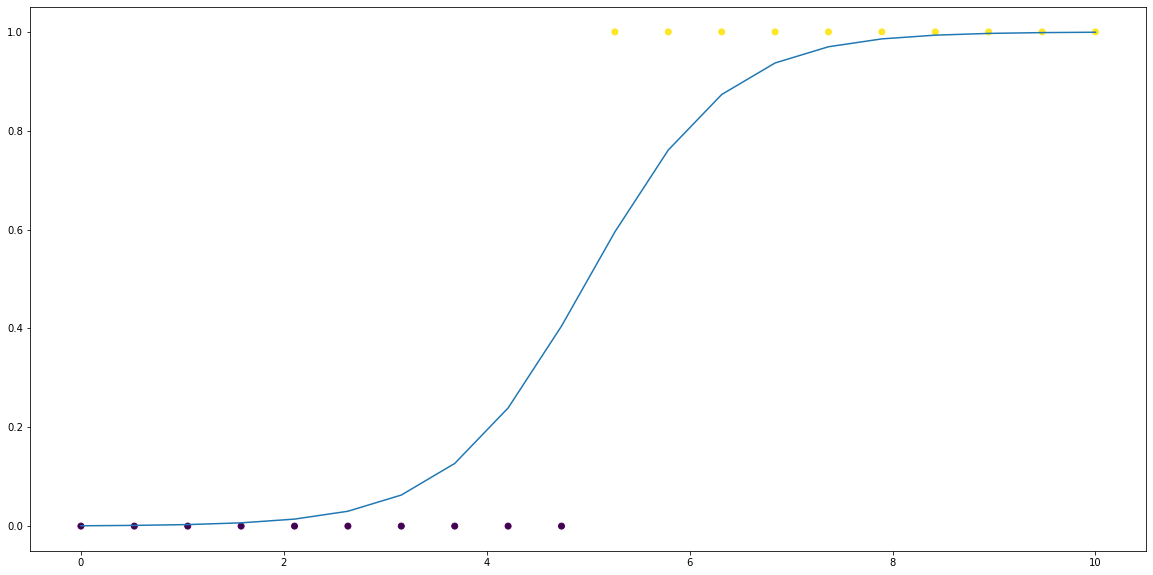

In [7]:
plt.scatter(x,y, c=y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])

In [8]:
b, b0 = model.coef_, model.intercept_
model.coef_, model.intercept_

(array([[1.46709085]]), array([-7.33542562]))

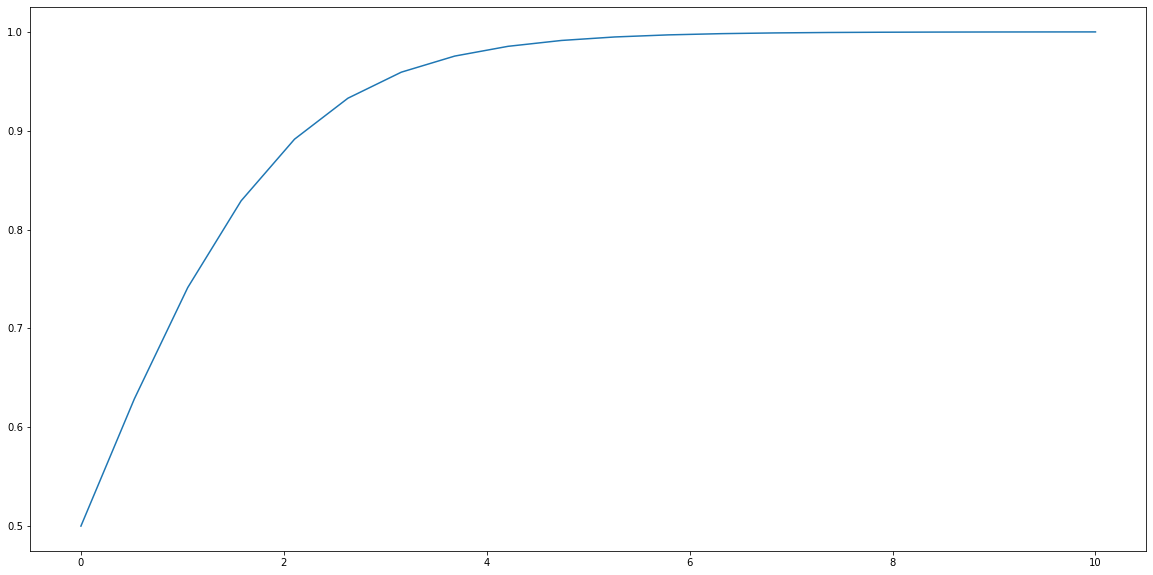

In [9]:
plt.plot(x, 1/(1+np.exp(-x)))

In [10]:
b

array([[1.46709085]])

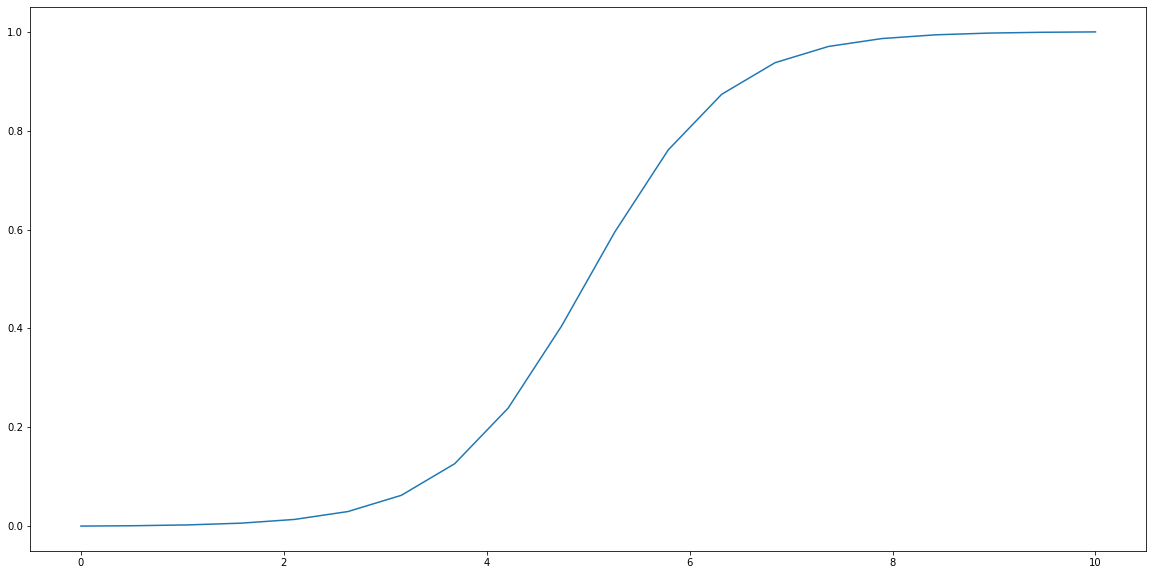

In [11]:
plt.plot(x, 1/(1+np.exp(-(b[0]*x +b0))))

C:\Users\gdlev\AppData\Local\Temp\ipykernel_16776\290434025.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


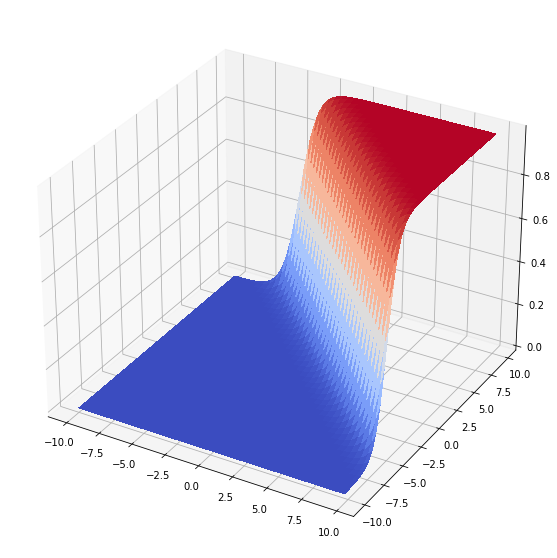

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1/(1+np.exp(-(b[0]*X +b[0]*Y +b0)))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [13]:
X

array([[-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       ...,
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75],
       [-10.  ,  -9.75,  -9.5 , ...,   9.25,   9.5 ,   9.75]])

In [14]:
Y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.75,  -9.75,  -9.75, ...,  -9.75,  -9.75,  -9.75],
       [ -9.5 ,  -9.5 ,  -9.5 , ...,  -9.5 ,  -9.5 ,  -9.5 ],
       ...,
       [  9.25,   9.25,   9.25, ...,   9.25,   9.25,   9.25],
       [  9.5 ,   9.5 ,   9.5 , ...,   9.5 ,   9.5 ,   9.5 ],
       [  9.75,   9.75,   9.75, ...,   9.75,   9.75,   9.75]])

What if the data doesn't really fit this pattern?

In [15]:
y = np.concatenate([np.zeros(10), np.ones(10), np.zeros(10)])
x = np.linspace(0, 10, len(y))

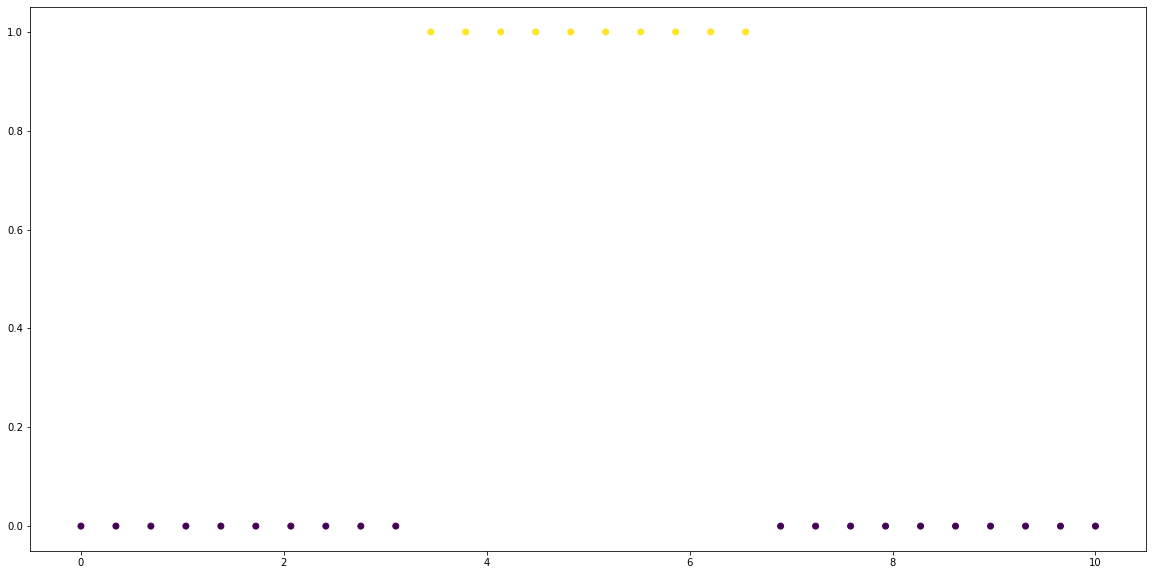

In [16]:
plt.scatter(x,y, c=y)

In [17]:
model.fit(x.reshape(-1, 1),y)

LogisticRegression()

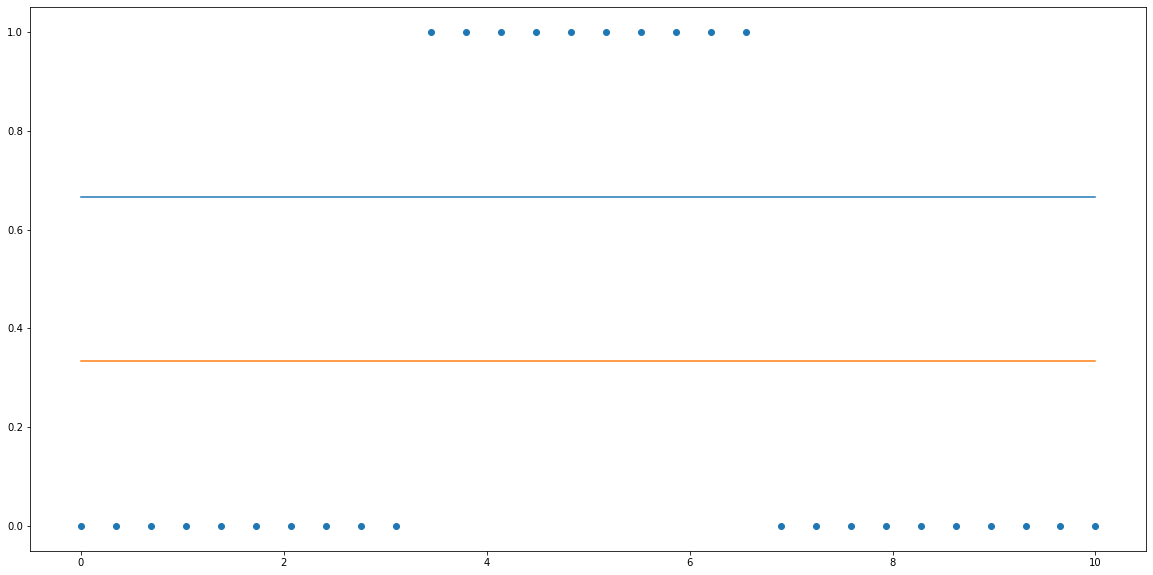

In [18]:
plt.scatter(x,y)
plt.plot(x, model.predict_proba(x.reshape(-1, 1)))

In [19]:
model1 = LogisticRegression()
model1.fit(x[:15].reshape(-1, 1),y[:15])

LogisticRegression()

In [20]:
model2 = LogisticRegression()
model2.fit(x[15:].reshape(-1, 1),y[15:])

LogisticRegression()

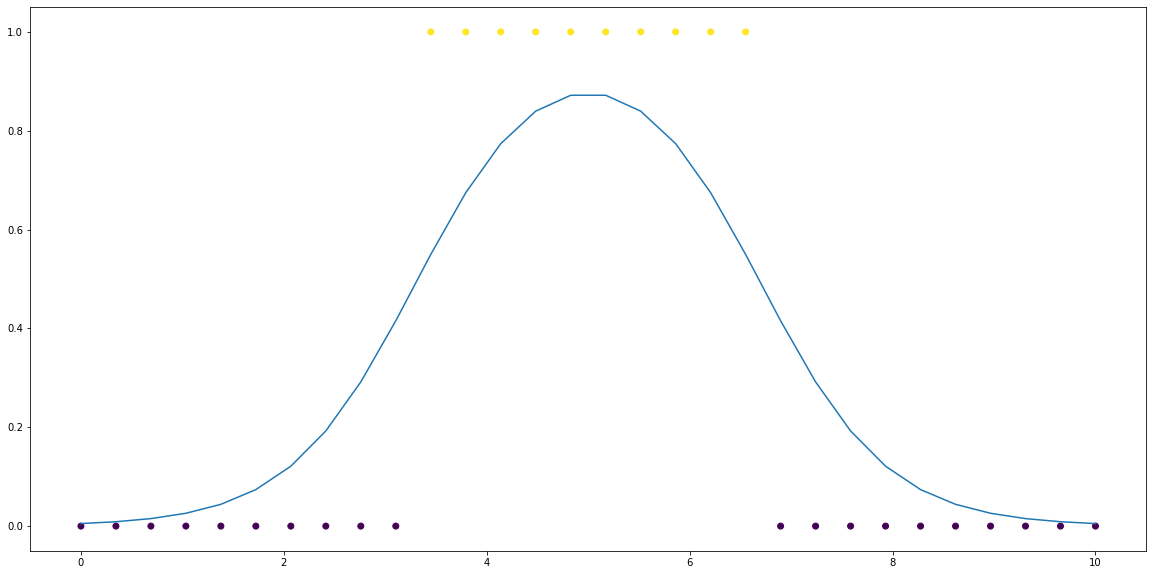

In [21]:
plt.scatter(x,y, c=y)
plt.plot(x, model1.predict_proba(x.reshape(-1, 1))[:,1] * model2.predict_proba(x.reshape(-1, 1))[:,1])

In [22]:
df = pd.read_csv('../data/adult.data', index_col=False)
golden = pd.read_csv('../data/adult.test', index_col=False)

In [23]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

In [24]:
transform_columns = ['sex', 'workclass', 'education', 'marital-status', 
                     'occupation', 'relationship', 'race', 'sex', 
                     'native-country', 'salary']

In [25]:
x = df.copy()

x[transform_columns] = enc.fit_transform(df[transform_columns])

golden['salary'] = golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K')
xt = golden.copy()

xt[transform_columns] = enc.transform(golden[transform_columns])

In [26]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [27]:
golden.salary.replace(' <=50K.', ' <=50K').replace(' >50K.', ' >50K').unique()

array([' <=50K', ' >50K'], dtype=object)

In [28]:
model.fit(preprocessing.scale(x.drop('salary', axis=1)), x.salary)

LogisticRegression()

In [29]:
pred = model.predict(preprocessing.scale(x.drop('salary', axis=1)))
pred_test = model.predict(preprocessing.scale(xt.drop('salary', axis=1)))

In [30]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [31]:
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, auc, roc_curve
)

In [32]:
accuracy_score(x.salary, pred)

0.8250360861152913

In [33]:
confusion_matrix(x.salary, pred)

array([[23300,  1420],
       [ 4277,  3564]], dtype=int64)

In [34]:
print(classification_report(x.salary, pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24720
         1.0       0.72      0.45      0.56      7841

    accuracy                           0.83     32561
   macro avg       0.78      0.70      0.72     32561
weighted avg       0.81      0.83      0.81     32561



In [35]:
print(classification_report(xt.salary, pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89     12435
         1.0       0.70      0.45      0.55      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.72     16281
weighted avg       0.81      0.82      0.81     16281



# Assignment 

## 1. Use your own dataset (create a train and a test set) and build 2 models: Logistic Regression and Decision Tree (shallow). Compare the test results using `classification_report` and `confusion_matrix`. Which algorithm is superior?
## 2. Repeat 1. but let the Decision Tree be much deeper to allow over-fitting. Compare the two models' test results again, and explain why it's superior

#### In fantasy football a player will either boom or bust which means the actual points the individual player scores will be significantly above the projected score or significantly below the projected score respectively. For simplicity purposes, I will only predict whether a player will boom as '1' and not boom as '0'. The exact calculation for booms and busts is widely unknown, however I will use a simple cutoff at 10%, meaning that if the player's actual score is >=10% of their projected score then I will consider that a boom, every other case is a not boom.

##### The dataset used came from this site: https://www.fantasyfootballdatapros.com/csv_files which shows players actual scores, projected scores for each week.

In [1]:

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import re
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report, 
    confusion_matrix, auc, roc_curve,
    roc_auc_score
)

In [2]:
df_orig = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")

C:\Users\gdlev\AppData\Local\Temp\ipykernel_14904\1755615869.py:1: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orig = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")


In [3]:
df = df_orig.copy()
# df = df.loc[df['play_type'] == 'pass']
# col_list = df.columns
# time_cols = [col for col in col_list if re.search(r"seconds_remaining", col)]


In [4]:
print(*list(df.columns), sep = "\n")

play_id
game_id
home_team
away_team
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_home_pass_epa
total_away_pass_e

In [28]:
## Number of plays that are either run or pass and down is 4th down
# df[(df.play_type.isin(['pass','run'])) & (df.down == 4)]
# ## 4721 pass/run on 4th

# df[(df.play_type.isin(['pass','run'])) & (df.down == 4) & (df.fourth_down_converted == 1)]
## 2338 converted
df[df.goal_to_go == 0][['posteam_type','posteam_score', 'defteam_score', 'score_differential']]

,posteam_type,posteam_score,defteam_score,score_differential
0,home,NaN,NaN,NaN
1,home,0.0,0.0,0.0
2,home,0.0,0.0,0.0
3,home,0.0,0.0,0.0
4,home,0.0,0.0,0.0
...,...,...,...,...
449365,home,7.0,12.0,-5.0
449366,home,7.0,12.0,-5.0
449367,home,7.0,12.0,-5.0
449368,home,7.0,12.0,-5.0


In [210]:
all_cols = df.columns
cols_include = [
    "posteam_type",
    "yardline_100",
    "quarter_seconds_remaining",
    "half_seconds_remaining",
    "game_seconds_remaining",
    "game_half",
    "drive",
    # "sp",
    "qtr",
    "down",
    "goal_to_go",
    "ydstogo",
    "play_type",
    "shotgun",
    "no_huddle",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining",
    "score_differential",
    "fourth_down_converted"
    
]
df = df_orig[cols_include].copy()

In [348]:
# for i in df.columns:
#     print(f"Column: {i}")
#     print(df[i].value_counts())

# category columns
# posteam_type
# game_half
# play_type

### Predict fourth down conversions


df_4th = df[(df.down == 4) & df.play_type.isin(['pass','run'])].copy()
df_4th.loc[(df_4th.score_differential >= -3) & (df_4th.score_differential < 0), 'curr_result'] = "losing_fg"
df_4th.loc[(df_4th.score_differential == 0), 'curr_result'] = "tied"
df_4th.loc[(df_4th.score_differential <= -3) & (df_4th.score_differential >= -7), 'curr_result'] = "losing_fg_td"
df_4th.loc[(df_4th.score_differential > 0), 'curr_result'] = "winning"
df_4th.loc[(df_4th.score_differential <= -7), 'curr_result'] = "losing_td"
df_4th = df_4th[(df_4th.score_differential >= -7) & (df_4th.score_differential <= 7)]
# df_4th = df_4th[df_4th.half_seconds_remaining >= 500]
# df_4th = df_4th[df_4th.game_seconds_remaining > 500]
df_4th = df_4th[df_4th.goal_to_go == 0]
df_4th = df_4th[df_4th.yardline_100 <= 50]


print(df_4th.describe())
print(df_4th.fourth_down_converted.value_counts())

cat_cols = ['posteam_type', 'game_half', 'curr_result']
df_4th = df_4th.drop(['down', 'play_type'], axis = 1)
df_4th = pd.concat([df_4th.drop(cat_cols, axis = 1), pd.get_dummies(df_4th[cat_cols])], axis = 1)
df_4th = df_4th.dropna()


# df_4th["curr_winning"] = np.where(df_4th.score_differential < 0, 0, 1)

       yardline_100  quarter_seconds_remaining  half_seconds_remaining  \
count   1373.000000                1373.000000             1373.000000   
mean      30.220685                 365.341588              702.923525   
std       12.941789                 269.673338              541.320495   
min        2.000000                   1.000000                1.000000   
25%       20.000000                 114.000000              146.000000   
50%       34.000000                 321.000000              661.000000   
75%       40.000000                 607.000000             1183.000000   
max       50.000000                 900.000000             1719.000000   

       game_seconds_remaining        drive          qtr    down  goal_to_go  \
count             1373.000000  1373.000000  1373.000000  1373.0      1373.0   
mean              1653.396941    11.804079     2.585579     4.0         0.0   
std               1175.071997     7.847689     1.232219     0.0         0.0   
min              

In [349]:
X_df = df_4th.drop("fourth_down_converted", axis = 1)
y_df = df_4th[["fourth_down_converted"]]

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, train_size = 0.75)

In [351]:
def get_accuracies(y_true, preds, model_name = "Model", verbose = True):
    acc = accuracy_score(y_true, preds)
    f1 = f1_score(y_true, preds)
    auc = roc_auc_score(y_true, preds)
    confus = confusion_matrix(y_true, preds)
    classif = classification_report(y_true, preds)

    acc_list = [acc,f1,auc, confus, classif]
    if verbose:
        print(f"\033[1m{model_name}\033[0m: \n\nAccuracy: {acc_list[0] * 100:.2f}%\n\nF1-Score: {acc_list[1] * 100:.2f}%\n\nAUC Score: {acc_list[2] * 100:.2f}%\n\nConfusion Matrix:\n {acc_list[3]}\n\nClassification Report:\n\n {acc_list[4]}\n\n")
    
    return acc_list

In [352]:
def train_model(X_df, y_df, trainsize = 0.75, model_type = "Logistic Regression", maxdepth = 5):
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, train_size = trainsize)
    if model_type == "Logistic Regression":
        model = linear_model.LogisticRegression()
    else:
        model = DecisionTreeClassifier(max_depth = maxdepth)

    model.fit(X_train, y_train.values.ravel())
    preds = model.predict(X_test)

    get_accuracies(y_test, preds, model_name = model_type)

    return model


In [353]:
print(train_model(X_df, y_df, model_type = "Logistic Regression"))
print(train_model(X_df, y_df, model_type = "Decision Tree"))
print(train_model(X_df, y_df, model_type = "Decision Tree", maxdepth = 20))

Logistic Regression: 

Accuracy: 63.66%

F1-Score: 72.65%

AUC Score: 60.35%

Confusion Matrix:
 [[ 53  96]
 [ 29 166]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.65      0.36      0.46       149
         1.0       0.63      0.85      0.73       195

    accuracy                           0.64       344
   macro avg       0.64      0.60      0.59       344
weighted avg       0.64      0.64      0.61       344



LogisticRegression()
Decision Tree: 

Accuracy: 60.17%

F1-Score: 68.36%

AUC Score: 57.58%

Confusion Matrix:
 [[ 59  87]
 [ 50 148]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.54      0.40      0.46       146
         1.0       0.63      0.75      0.68       198

    accuracy                           0.60       344
   macro avg       0.59      0.58      0.57       344
weighted avg       0.59      0.60      0.59       344



DecisionTreeClassifier(max_depth=5)

c:\Users\gdlev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [253]:
model = train_model(X_df, y_df, model_type = "Decision Tree")

Decision Tree: 

Accuracy: 60.91%

F1-Score: 65.17%

AUC Score: 60.96%

Confusion Matrix:
 [[213 226]
 [116 320]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.65      0.49      0.55       439
         1.0       0.59      0.73      0.65       436

    accuracy                           0.61       875
   macro avg       0.62      0.61      0.60       875
weighted avg       0.62      0.61      0.60       875





In [199]:
importance_df = pd.DataFrame(list(zip(model.feature_names_in_, model.feature_importances_)))
importance_df = importance_df.rename(columns = {importance_df.columns[0]: "featurename", importance_df.columns[1]: "importance"})

In [200]:
importance_df[importance_df.importance == 0].featurename

5            goal_to_go
7               shotgun
8             no_huddle
12    posteam_type_away
14         curr_winning
Name: featurename, dtype: object

In [39]:
# interception: target
# pass_length: "deep", "short"
# pass_location: "left", "right", "middle"
# total_home_pass_epa: cumulative total passing EPA for home team
# total_away_pass_epa: cumulative total passing EPA for away team
# ydsnet: numeric value for total yards gained on given drive respective to home team
# anything with total or score
# result all respective to home team, so if negative means home team lost
# drive_start_yardline, drive_end_yard_line
# yardline_100 distance to oppoents endzone
# yrdln: current field position
# ydstogo: either first down or endzone
#  air_yards: number of yards ball was in air
# seconds remaining
# shotgun


In [40]:
col_list = [
    "qb_dropback",
    "no_huddle",
    "posteam_score",
    "defteam_score",
    "score_differential",
    "shotgun",
    "no_huddle",
    "pass_length",
    "pass_location",
    "down",
    "ydstogo",
    "yardline_100",
    "posteam_type",
    "qtr",
    "game_half",
    "posteam_timeouts_remaining",
    "defteam_timeouts_remaining"
    
]
col_list.extend(time_cols)

In [44]:
df_model = df[col_list]
df_model['id'] = range(0, len(df_model))
df_model = df_model.dropna()

C:\Users\gdlev\AppData\Local\Temp\ipykernel_16776\491085233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['id'] = range(0, len(df_model))


In [47]:
df_orig.describe()

,play_id,game_id,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,assist_tackle_4_team,fumble_recovery_1_yards,fumble_recovery_2_yards,return_yards,penalty_yards,replay_or_challenge,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
count,449371.000000,4.493710e+05,436301.000000,449230.000000,449206.000000,449208.000000,449371.000000,449371.000000,449371.000000,449371.000000,...,0.0,6026.000000,47.000000,449350.000000,32618.000000,449371.000000,436497.000000,436497.000000,436497.0,436497.0
mean,2140.689606,2.013620e+09,49.800658,413.968820,810.775709,1700.697033,0.017111,12.275053,0.072090,2.577696,...,NaN,2.302688,4.808511,1.042773,8.487829,0.001823,0.000069,0.000014,0.0,0.0
std,1240.303671,2.842246e+06,25.062131,279.137304,554.712205,1053.533368,0.129684,7.124626,0.258637,1.129958,...,NaN,9.066064,14.961746,5.462253,5.323953,0.042652,0.008290,0.003708,0.0,0.0
min,35.000000,2.009091e+09,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,NaN,-34.000000,-16.000000,-18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1074.000000,2.011111e+09,31.000000,152.000000,286.000000,784.000000,0.000000,6.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,2125.000000,2.013123e+09,52.000000,396.000000,797.000000,1800.000000,0.000000,12.000000,0.000000,3.000000,...,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,3180.000000,2.016103e+09,71.000000,656.000000,1288.000000,2583.000000,0.000000,18.000000,0.000000,4.000000,...,NaN,0.000000,4.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.0
max,5706.000000,2.018122e+09,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,NaN,93.000000,77.000000,109.000000,66.000000,1.000000,1.000000,1.000000,0.0,0.0


In [45]:
cat_cols = ['pass_length', 'pass_location', 'game_half', 'posteam_type', 'qb_dropback', 'no_huddle']
num_cols = list(set(df_model.columns) - set(cat_cols))
num_cols.remove('interception')
num_cols.remove('id')
target_col = 'interception'

ValueError: list.remove(x): x not in list

In [43]:
X_df = pd.concat([df_model['id'],df_model[num_cols],pd.get_dummies(df_model[cat_cols])], axis = 1)
y_df = pd.concat([df_model['id'],df_model[target_col]], axis = 1)
y_df = y_df.loc[y_df.id.isin(list(X_df.id))]

X_df = X_df.drop('id', axis = 1)
y_df = y_df.drop('id', axis = 1)

NameError: name 'target_col' is not defined

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, train_size = 0.7)

In [708]:
ideal_sample = math.ceil(df_model.interception.value_counts()[1] * 3)
print(ideal_sample)
df_Train = pd.concat([X_train, y_train], axis = 1)
int_Train = df_Train.loc[df_Train['interception'] == 1]
nonint_Train = df_Train.loc[df_Train['interception'] == 0].sample(ideal_sample)

df_train = pd.concat([int_Train, nonint_Train], axis = 0).sample(frac = 1)

X_train = df_train.drop('interception', axis = 1)
y_train = df_train[['interception']]

12843


In [709]:
# class_weight = 'balanced', penalty = 'l1', solver = 'liblinear'
logit = linear_model.LogisticRegression(class_weight = 'balanced', penalty = 'l1', solver = 'liblinear')

In [710]:
logit.fit(X_train, y_train)

c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
def get_accuracies(y_true, preds, model_name = "Model", verbose = True):
    acc = accuracy_score(y_true, preds)
    f1 = f1_score(y_true, preds)
    auc = roc_auc_score(y_true, preds)
    confus = confusion_matrix(y_true, preds)
    classif = classification_report(y_true, preds)

    acc_list = [acc,f1,auc, confus, classif]
    if verbose:
        print(f"\033[1m{model_name}\033[0m: \n\nAccuracy: {acc_list[0] * 100:.2f}%\n\nF1-Score: {acc_list[1] * 100:.2f}%\n\nAUC Score: {acc_list[2] * 100:.2f}%\n\nConfusion Matrix:\n {acc_list[3]}\n\nClassification Report:\n\n {acc_list[4]}\n\n")
    
    return acc_list

In [712]:
df_model.describe()

,interception,shotgun,no_huddle,down,ydstogo,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,id
count,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000,173850.000000
mean,0.024625,0.698062,0.103837,1.932994,8.929842,52.985246,419.047570,809.746448,1701.877596,93325.843296
std,0.154979,0.459100,0.305049,0.843030,3.972534,23.983619,272.915249,547.474429,1039.432938,53883.072408
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,7.000000,35.000000,165.000000,298.000000,795.000000,46633.250000
50%,0.000000,1.000000,0.000000,2.000000,10.000000,57.000000,404.000000,785.000000,1794.000000,93416.500000
75%,0.000000,1.000000,0.000000,3.000000,10.000000,73.000000,657.000000,1282.000000,2557.000000,139992.750000
max,1.000000,1.000000,1.000000,4.000000,50.000000,99.000000,900.000000,1800.000000,3600.000000,186676.000000


Logistic Regression: 

Accuracy: 96.92%

F1-Score: 6.62%

AUC Score: 51.84%

Confusion Matrix:
 [[50491   370]
 [ 1238    57]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     50861
         1.0       0.13      0.04      0.07      1295

    accuracy                           0.97     52156
   macro avg       0.55      0.52      0.53     52156
weighted avg       0.96      0.97      0.96     52156





c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


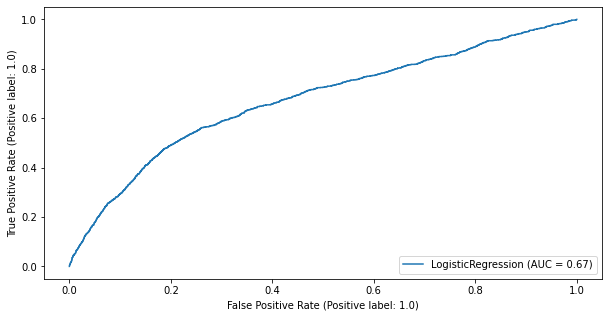

In [713]:
preds = logit.predict(X_test)
model_type = "Logistic Regression"
acc_list = get_accuracies(y_test, preds)

print(f"\033[1m{model_type}\033[0m: \n\nAccuracy: {acc_list[0] * 100:.2f}%\n\nF1-Score: {acc_list[1] * 100:.2f}%\n\nAUC Score: {acc_list[2] * 100:.2f}%\n\nConfusion Matrix:\n {acc_list[3]}\n\nClassification Report:\n\n {acc_list[4]}\n\n")

metrics.plot_roc_curve(logit, X_test, y_test)
        

In [698]:
dt = DecisionTreeClassifier(max_depth = 20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

Decision Tree Classifier: 

Accuracy: 79.71%

F1-Score: 7.31%

AUC Score: 56.21%

Confusion Matrix:
 [[41157  9673]
 [  909   417]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     50830
         1.0       0.04      0.31      0.07      1326

    accuracy                           0.80     52156
   macro avg       0.51      0.56      0.48     52156
weighted avg       0.95      0.80      0.87     52156





c:\Users\gdlev\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


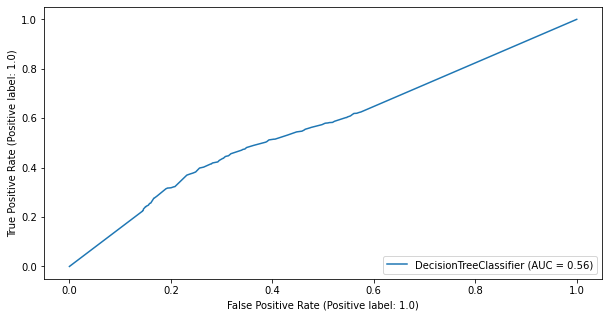

In [699]:
preds = dt.predict(X_test)
model_type = "Decision Tree Classifier"
acc_list = get_accuracies(y_test, preds)

print(f"\033[1m{model_type}\033[0m: \n\nAccuracy: {acc_list[0] * 100:.2f}%\n\nF1-Score: {acc_list[1] * 100:.2f}%\n\nAUC Score: {acc_list[2] * 100:.2f}%\n\nConfusion Matrix:\n {acc_list[3]}\n\nClassification Report:\n\n {acc_list[4]}\n\n")

metrics.plot_roc_curve(dt, X_test, y_test)